In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import neurd

In [19]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz
from pathlib import Path
import os

import inspect
print(inspect.getfile(tu))


/usr/local/lib/python3.8/dist-packages/mesh_tools/trimesh_utils.py


Use MeshParty to Upload ChenLab Data 

In [20]:
#  ChenLab script...

from meshparty import trimesh_io  # for grabbing a mesh
from meshparty import trimesh_vtk  # for visualizing meshes and skeletons
    
# provide the DENDRITIC segmentation ID for the cell of interest
dend_id = 75719036679410195  

# Get the DENDRITIC segmentation mesh from neuroglancer
mm = trimesh_io.MeshMeta(
        cv_path="precomputed://gs://zetta_jchen_mouse_cortex_001_segmentation/cell/lowres/240820_emb24_lowres_x1/seg", 
        map_gs_to_https=True)

mesh = mm.mesh(seg_id=dend_id) 

# visualize the mesh
mesh_actor = trimesh_vtk.mesh_actor(mesh,  color=(1,0,0),  opacity=0.25)
#trimesh_vtk.render_actors([mesh_actor]) #NOTE: need to close the window when done to unpause python

# store the mesh
# Define the local file path where you want to save the mesh (with .off extension)
local_file_path = "32414.off"
# Export the mesh to a .off file
mesh.export(local_file_path)
# Confirm the file has been saved
print(f"Mesh has been saved to {os.path.abspath(local_file_path)}")


#import skeletor as sk
# pre-process the mesh (may not be necessary)
#mesh_fix = sk.pre.fix_mesh(mesh) #
#mesh_fix_actor = trimesh_vtk.mesh_actor(mesh_fix,  color=(1,0,0),  opacity=0.25)
#trimesh_vtk.render_actors([mesh_actor, mesh_fix_actor]) 



Mesh has been saved to /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/32414.off


# Load the appropriate volume data inferface object

In [21]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

# Data Prep: Loading mesh

In [22]:
# ChenLab MESH!!!
segment_id = 32414

mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)

mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(365198, 3), faces.shape=(730572, 3), name=`32414.off`)>

In [23]:
# analyze dataset properties (ChenLab)

filepath = '32414.off'
print(f'mesh size {os.path.getsize(filepath)} bytes')


mesh size 36116418 bytes


In [24]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

Decimation involves


In [25]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [26]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [27]:
import time

# tu

st = time.time()
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

print(f"Total time = {time.time() - st}")

xvfb-run -n 6097 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_87697.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_87697_decimated.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/decimation_meshlab_25378983.mls
Total time = 22.671700477600098


In [28]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':32414,
  },
}



# Step 2: Soma Identification

In [29]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [30]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [31]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 3761 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_39653.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_39653_remove_interior.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_139021.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_39653.off
removed temporary output file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_39653_remove_interior.off
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_S

  0%|          | 0/14 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.8670964999999999]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5263 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_716048.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_716048_poisson.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_662911.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_716048.off
removed temporary output file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_716048_poisson.off
mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_662911.mls is being deleted....
Inside sphere validater: ratio_val = 2.48

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.577805]
xz = 6.232575437305518 ratio was beyong 6 multiplier
yz = 7.309074290114619 ratio was beyong 6 multiplier
mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_719686.mls is being deleted....
Inside sphere validater: ratio_val = 455.11247054898183
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(542, 3), faces.shape=(1077, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = False, curr_volume_check = False
perc_0_faces = 0.002785515320334262
Going to run cgal segmentation with:
File: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/522_mesh 
clusters:3 
smoothness:0.2

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

yz = 6.041267222886148 ratio was beyong 6 multiplier
mesh.is_watertight = True
/NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_824506.mls is being deleted....
Inside sphere validater: ratio_val = 393.3269542168001
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(457, 3), faces.shape=(908, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = False, curr_volume_check = False



 Total time for run = 52.932541847229004
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 1091 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_13927.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neur

  0%|          | 0/1 [00:00<?, ?it/s]

Largest hole before segmentation = 131857.2229139092, after = 131857.2229139092,

ratio = 1.0, difference = 0.0
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(8836, 3), faces.shape=(17487, 3))>]
Not need to do a second pass because already found a soma


xvfb-run -n 8875 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_12305.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_12305_fill_holes.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/fill_holes_342455.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_12305.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_12305_fill_holes.off
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/fill_holes_342455.mls is being deleted....
xvfb-run -n 1623 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_242.off -o /neurd_packages/NEURD/Applicat

In [32]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 1


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [33]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [34]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':32414,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(4492, 3), faces.shape=(8984, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(8836, 3), faces.shape=(17487, 3))>],
    'soma_run_time':52.93254089355469,
    'soma_sdfs':array([0.8670965]),
  },
}



# Step 2b: Saving off pipeline products

In [35]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/products_up_to_soma_stage.pkl
File size is 7.846925 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4492, 3), faces.shape=(8984, 3))>:140162526462448
Cleared mesh: <trimesh.Trimesh(vertices.shape=(8836, 3), faces.shape=(17487, 3))>:140162294571360


# Step 3: Decomposition

In [36]:
import networkx as nx
nx.__version__

'2.8.8'

In [37]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(8836, 3), faces.shape=(17487, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(8836, 3), faces.shape=(17487, 3))>]
soma_mesh_list_centers = [array([1493644.32163875,  906203.41836804,   80231.07457673])]
Getting Glia and Nuclei Pieces Subtracted Away 0.3420708179473877
 Splitting mesh after soma cancellation 0.6517734527587891
# of split_meshes = 58
 Containing Mesh Indices 0.06932401657104492
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 5.9604644775390625e-05
There were 57 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 2.081627607345581
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/341429 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.66s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 7.111762523651123
connecting at the root
branches_touching_root = [40]
combining close nodes
combine_threshold = 700
length of Graph = 14077
After combining close endpoints max(kept_branches_idx) = 40, len(kept_branches_idx) = 41
empty_indices % = 0.0
 conflict_indices % = 0.00812614326479842


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

Decomposing first pass: 31.808095693588257
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [15983, 8468, 7676, 52604, 64783, 7802, 19097, 16031, 9458, 1371, 11806, 4295, 8559, 65325, 6775, 9166, 17336, 10457, 13756, 4977, 18965, 27310, 17524, 6028, 1089, 18529, 46875, 9531, 29589, 2205, 3847, 634, 7771, 19266, 17331, 11752, 8669, 23122, 12779, 23961, 20848]
mesh_large_connectivity: 5.148449897766113
Finding MAP candidates connected components: 0.0005960464477539062
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.17461347579956055
Grouping MP Sublimbs by Graph: 5.817413330078125e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.07820844650268555
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9560 -s "-screen 0 800x600x24" m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.30304598808288574
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 318.46705317497253
Checking connected components after removing cycles
Total time for mesh KDTree = 4.943996429443359
sbv[0].reshape(-1,3) = [[1497899.875      904530.3125      75624.9296875]]
closest_sk_pt_coord BEFORE = [1495460.   902495.    77538.6]
current_skeleton.shape = (10693, 2, 3)
node_for_stitch = 3900: [1495460.   902495.    77538.6]
node_for_stitch AFTER = 3900: [1495460.   902495.    77538.6]
possible_node_loc = [    0    13    60    61    89   102   116   173   180   248   257   273
   293   294   316   343   356   372   395   418   432   499   506   571
   584   588   624   632   674   679   697   705   721   732   801   807
   823   857   876   897   906   960  1015  1076  1150  1157  1168  1180
  1185  1192  1232  1259  1274  1355  1467  1468  1

  0%|          | 0/262 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (9309, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 2 valid paths to replace
valid_paths = [array([1978., 2004.]), array([4614., 4618., 4623., 4627.])]
valid_path_lengths = [336.37718412520513, 598.8813948692622]
length of Graph = 9309
Working on path [1978. 2004.]
path_degrees = [3, 3]
Working on path [4614. 4618. 4623. 4627.]
path_degrees = [3, 2, 2, 3]
node_degrees = [2 4 2 2 2 2 2 3 2]
skeletonize_and_clean_connected_branch_CGAL: 384.31022810935974
Working on limb correspondence for #0 MAP piece
xvfb-run -n 3331 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_38292.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_38292_remove_interior.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/

0it [00:00, ?it/s]

empty mesh_correspondence_indices_2 returned so returning original mesh correspondence
Got nothing from first pass so expanding the mesh correspondnece parameters 
empty mesh_correspondence_indices_2 returned so returning original mesh correspondence
empty mesh_correspondence_indices_2 returned so returning original mesh correspondence
Total time for decomposition = 96.28262543678284
mesh_correspondence_first_pass: 96.28267431259155
Limb decomposed into 60 branches
divided_skeleton_graph_recovered = (9299, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (9299, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (59, 60)
empty_indices % = 0.10492719689763665
 conflict_indices % = 0.029191483134557692


  0%|          | 0/568 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

Took 2 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0012263115533767469


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 584.4842419624329
correspondence_1_to_1: 103.81300234794617
Total time for MAP sublimb processing 584.4843745231628
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 629.0801026821136
Number of matching vertices = 3
Number of matching vertices = 0
Number of matching vertices = 0
Number of matching vertices = 3
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/60 [00:00<?, ?it/s]

683349 683350
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 656.1076619625092


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(326, 3), faces.shape=(652, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/325 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.73it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03408002853393555
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 28
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [443.24933205]
width_median= 443.2493320473115
segment_widths_median = [443.24933205]
Decomposing first pass: 0.06735706329345703
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.384185791015625e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.8835067749023438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10337638854980469


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.17836952209472656
Floating 1: <trimesh.Trimesh(vertices.shape=(192, 3), faces.shape=(380, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 9.775161743164062e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/191 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51.09it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04872250556945801
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.05915498733520508
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [380]
mesh_large_connectivity: 0.00016546249389648438
Finding MAP candidates connected components: 8.273124694824219e-05
Divinding into MP and MAP pieces: 2.6226043701171875e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.574920654296875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1107797622680664


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.17460417747497559
Floating 2: <trimesh.Trimesh(vertices.shape=(178, 3), faces.shape=(352, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.67572021484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 73.22it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.035162925720214844
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04590725898742676
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [352]
mesh_large_connectivity: 0.00010609626770019531
Finding MAP candidates connected components: 5.817413330078125e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.8596649169921875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08257770538330078


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13368630409240723
Floating 3: <trimesh.Trimesh(vertices.shape=(169, 3), faces.shape=(334, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50.12it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.041066884994506836
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 12
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04947400093078613
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [334]
mesh_large_connectivity: 0.00010156631469726562
Finding MAP candidates connected components: 5.698204040527344e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.8835067749023438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09241795539855957


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14814233779907227
Floating 4: <trimesh.Trimesh(vertices.shape=(162, 3), faces.shape=(320, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.9141387939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.52it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04123210906982422
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 14
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [396.96785751]
width_median= 396.96785750577834
segment_widths_median = [396.96785751]
Decomposing first pass: 0.05710554122924805
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.552436828613281e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6226043701171875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10029220581054688


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.17118048667907715
Floating 5: <trimesh.Trimesh(vertices.shape=(145, 3), faces.shape=(286, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.344650268554688e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.17it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.053462982177734375
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.055191755294799805
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [286]
mesh_large_connectivity: 0.0001442432403564453
Finding MAP candidates connected components: 6.365776062011719e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.11073923110961914


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1682267189025879
Floating 6: <trimesh.Trimesh(vertices.shape=(141, 3), faces.shape=(290, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.51it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05357527732849121
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 17
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.05389213562011719
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [290]
mesh_large_connectivity: 0.00013136863708496094
Finding MAP candidates connected components: 8.821487426757812e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 4.5299530029296875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.8133392333984375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1099233627319336


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.17197322845458984
Floating 7: <trimesh.Trimesh(vertices.shape=(131, 3), faces.shape=(258, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.67572021484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.98it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05933833122253418
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04804396629333496
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [258]
mesh_large_connectivity: 0.00014472007751464844
Finding MAP candidates connected components: 8.0108642578125e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.4080276489257812e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.11031794548034668


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1706371307373047
Floating 8: <trimesh.Trimesh(vertices.shape=(123, 3), faces.shape=(242, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 73.82it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0323026180267334


branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.0495297908782959
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [242]
mesh_large_connectivity: 0.00011324882507324219
Finding MAP candidates connected components: 6.389617919921875e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08328437805175781


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14106988906860352
Floating 9: <trimesh.Trimesh(vertices.shape=(121, 3), faces.shape=(238, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.58306884765625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.81it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04359579086303711
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.05614948272705078
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [238]
mesh_large_connectivity: 0.00012969970703125
Finding MAP candidates connected components: 6.985664367675781e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10158729553222656


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1572895050048828
Floating 10: <trimesh.Trimesh(vertices.shape=(85, 3), faces.shape=(166, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48.96it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03855276107788086
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.045073747634887695
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [166]
mesh_large_connectivity: 0.00012874603271484375
Finding MAP candidates connected components: 9.179115295410156e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08570051193237305


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13475394248962402
Floating 11: <trimesh.Trimesh(vertices.shape=(84, 3), faces.shape=(164, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.0013580322265625e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.32it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04295635223388672
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04213309288024902
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [164]
mesh_large_connectivity: 0.00013303756713867188
Finding MAP candidates connected components: 8.988380432128906e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.288818359375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08670425415039062


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14568114280700684
Floating 12: <trimesh.Trimesh(vertices.shape=(83, 3), faces.shape=(162, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.1682510375976562e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.96it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04435133934020996
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04929471015930176
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [162]
mesh_large_connectivity: 0.000102996826171875
Finding MAP candidates connected components: 5.5789947509765625e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.409385681152344e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09529232978820801


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15238189697265625
Floating 13: <trimesh.Trimesh(vertices.shape=(80, 3), faces.shape=(156, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.56it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.044920921325683594
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04938101768493652
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [156]
mesh_large_connectivity: 0.00010538101196289062
Finding MAP candidates connected components: 5.8650970458984375e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9073486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09560728073120117


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14790797233581543
Floating 14: <trimesh.Trimesh(vertices.shape=(79, 3), faces.shape=(154, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.7881393432617188e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.15it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03858160972595215
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04958462715148926
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [154]
mesh_large_connectivity: 0.00014662742614746094
Finding MAP candidates connected components: 7.605552673339844e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.5987625122070312e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.0900580883026123


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16318082809448242
Floating 15: <trimesh.Trimesh(vertices.shape=(69, 3), faces.shape=(134, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 69.88it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03395390510559082
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04009580612182617
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [134]
mesh_large_connectivity: 0.00010919570922851562
Finding MAP candidates connected components: 5.984306335449219e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.0755758285522461


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12672114372253418
Floating 16: <trimesh.Trimesh(vertices.shape=(69, 3), faces.shape=(134, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.5020370483398438e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.02it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03930354118347168
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.0404810905456543
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [134]
mesh_large_connectivity: 0.00011086463928222656
Finding MAP candidates connected components: 9.894371032714844e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08132338523864746


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13526248931884766
Floating 17: <trimesh.Trimesh(vertices.shape=(62, 3), faces.shape=(120, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.67572021484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 67.19it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.032294273376464844
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.036943912506103516
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [120]
mesh_large_connectivity: 0.00013875961303710938
Finding MAP candidates connected components: 0.00011420249938964844
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.5510787963867188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07114672660827637


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12260675430297852
Floating 18: <trimesh.Trimesh(vertices.shape=(61, 3), faces.shape=(118, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.106231689453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57.67it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04105830192565918
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04798126220703125
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [118]
mesh_large_connectivity: 0.00011730194091796875
Finding MAP candidates connected components: 0.0001308917999267578
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.574920654296875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09076881408691406


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13962769508361816
Floating 19: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(116, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 74.92it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.039406776428222656
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.03756856918334961
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [116]
mesh_large_connectivity: 0.00014781951904296875
Finding MAP candidates connected components: 8.106231689453125e-05
Divinding into MP and MAP pieces: 2.1457672119140625e-06
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.123283386230469e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07930827140808105


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13171172142028809
Floating 20: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(116, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 74.22it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04285383224487305
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.0471649169921875
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [116]
mesh_large_connectivity: 0.000152587890625
Finding MAP candidates connected components: 8.225440979003906e-05
Divinding into MP and MAP pieces: 2.1457672119140625e-06
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.3855438232421875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09209132194519043


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1402449607849121
Floating 21: <trimesh.Trimesh(vertices.shape=(59, 3), faces.shape=(114, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.53it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03015279769897461
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04334688186645508
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [114]
mesh_large_connectivity: 0.00013017654418945312
Finding MAP candidates connected components: 7.367134094238281e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.7418136596679688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07532954216003418


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12568330764770508
Floating 22: <trimesh.Trimesh(vertices.shape=(58, 3), faces.shape=(112, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.14it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0434267520904541
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.03941488265991211
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [112]
mesh_large_connectivity: 0.0001380443572998047
Finding MAP candidates connected components: 0.00012111663818359375
Divinding into MP and MAP pieces: 2.384185791015625e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6702880859375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08459234237670898


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1306614875793457
Floating 23: <trimesh.Trimesh(vertices.shape=(52, 3), faces.shape=(100, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.344650268554688e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49.82it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04868340492248535
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 2
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.035041093826293945
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [100]
mesh_large_connectivity: 9.679794311523438e-05
Finding MAP candidates connected components: 5.841255187988281e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08527040481567383


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13902020454406738


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07532997102693421
 conflict_indices % = 0.001900878389772048


  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 37


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.039514076070679846
 conflict_indices % = 0.0026954177897574125


  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 41


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.03688220618973771
 conflict_indices % = 0.0027644798058121503


  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 40


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.057849019432255754
 conflict_indices % = 0.00390436106384884


  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 37


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.02449554762690013
 conflict_indices % = 0.0035079303211105447


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 42


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.026542848786194794
 conflict_indices % = 0.004058204153261188


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 42


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.0339943342776204
 conflict_indices % = 0.013831028161973005


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 69


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07030165341411082
 conflict_indices % = 0.008771929824561403


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 67


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.05984145640051014
 conflict_indices % = 0.004976368501337868


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 37


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.08466290218668283
 conflict_indices % = 0.0059877970212604695


  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 37


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.054484973617802246
 conflict_indices % = 0.02144987382427162


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 35


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.18127936393205638
 conflict_indices % = 0.0


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 12
Total time for stitching floating pieces = 86.26924562454224
Total time for Concept Networks = 3.871325969696045
Total time for all mesh and skeletonization decomp = 746.2488996982574
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2494 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_249091.off -o /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_249091_poisson.off -s /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_655525.mls
removed temporary input file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_249091.off
removed temporary output file: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_249091_poisson.off
/NEUR

TypeError: only integer scalar arrays can be converted to a scalar index

In [39]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)

NameError: name 'neuron_obj' is not defined

# Calculate statistics

In [32]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [33]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':32414,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(54, 3), faces.shape=(18, 3))>, <trimesh.Trimesh(vertices.shape=(4, 3), faces.shape=(2, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(40159, 3), faces.shape=(79672, 3))>],
    'soma_run_time':74.73318791389465,
    'soma_sdfs':array([0.808672]),
  },
  'decomposition':
  {
    'bbox_volume':1.152083844966394,
    'bbox_x_max':1285750.0,
    'bbox_x_max_soma_relative':65183.36356420722,
    'bbox_x_min':1191260.0,
    'bbox_x_min_soma_relative':-29306.63643579278,
    'bbox_y_max':1293642.4680380581,
    'bbox_y_max_soma_relative':76223.39815334976,
    'bbox_y_min':1191340.0,
    '

# Saving off neuron

In [34]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.17027544975280762
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 1.0206191539764404
Total time for limb_meshes compression = 0.5105800628662109
    Starting Limb Correspondence Compression


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 2.271036148071289
Cleared mesh: <trimesh.Trimesh(vertices.shape=(54, 3), faces.shape=(18, 3))>:139930996849344
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4, 3), faces.shape=(2, 3))>:139930996764144
Cleared mesh: <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>:139930994935792
Cleared mesh: <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>:139930981219488
Cleared mesh: <trimesh.Trimesh(vertices.shape=(40159, 3), faces.shape=(79672, 3))>:139930985627904
Total time for compression = 8.523629665374756


---Finished outputing neuron at location: /NEURD_Chenlab/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/32414---
saved neuron filepath = 32414


'32414.pbz2'

# Reloading the Neuron

In [40]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    #mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [41]:
nviz.visualize_neuron(
    neuron_obj_rec,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [43]:
print(neuron_obj_rec.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':32414,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(54, 3), faces.shape=(18, 3))>, <trimesh.Trimesh(vertices.shape=(4, 3), faces.shape=(2, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(40159, 3), faces.shape=(79672, 3))>],
    'soma_run_time':74.73318791389465,
    'soma_sdfs':array([0.808672]),
  },
  'decomposition':
  {
    'bbox_volume':1.152083844966394,
    'bbox_x_max':1285750.0,
    'bbox_x_max_soma_relative':65183.36356420722,
    'bbox_x_min':1191260.0,
    'bbox_x_min_soma_relative':-29306.63643579278,
    'bbox_y_max':1293642.4680380581,
    'bbox_y_max_soma_relative':76223.39815334976,
    'bbox_y_min':1191340.0,
    '

# Exporting Branch meshes

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


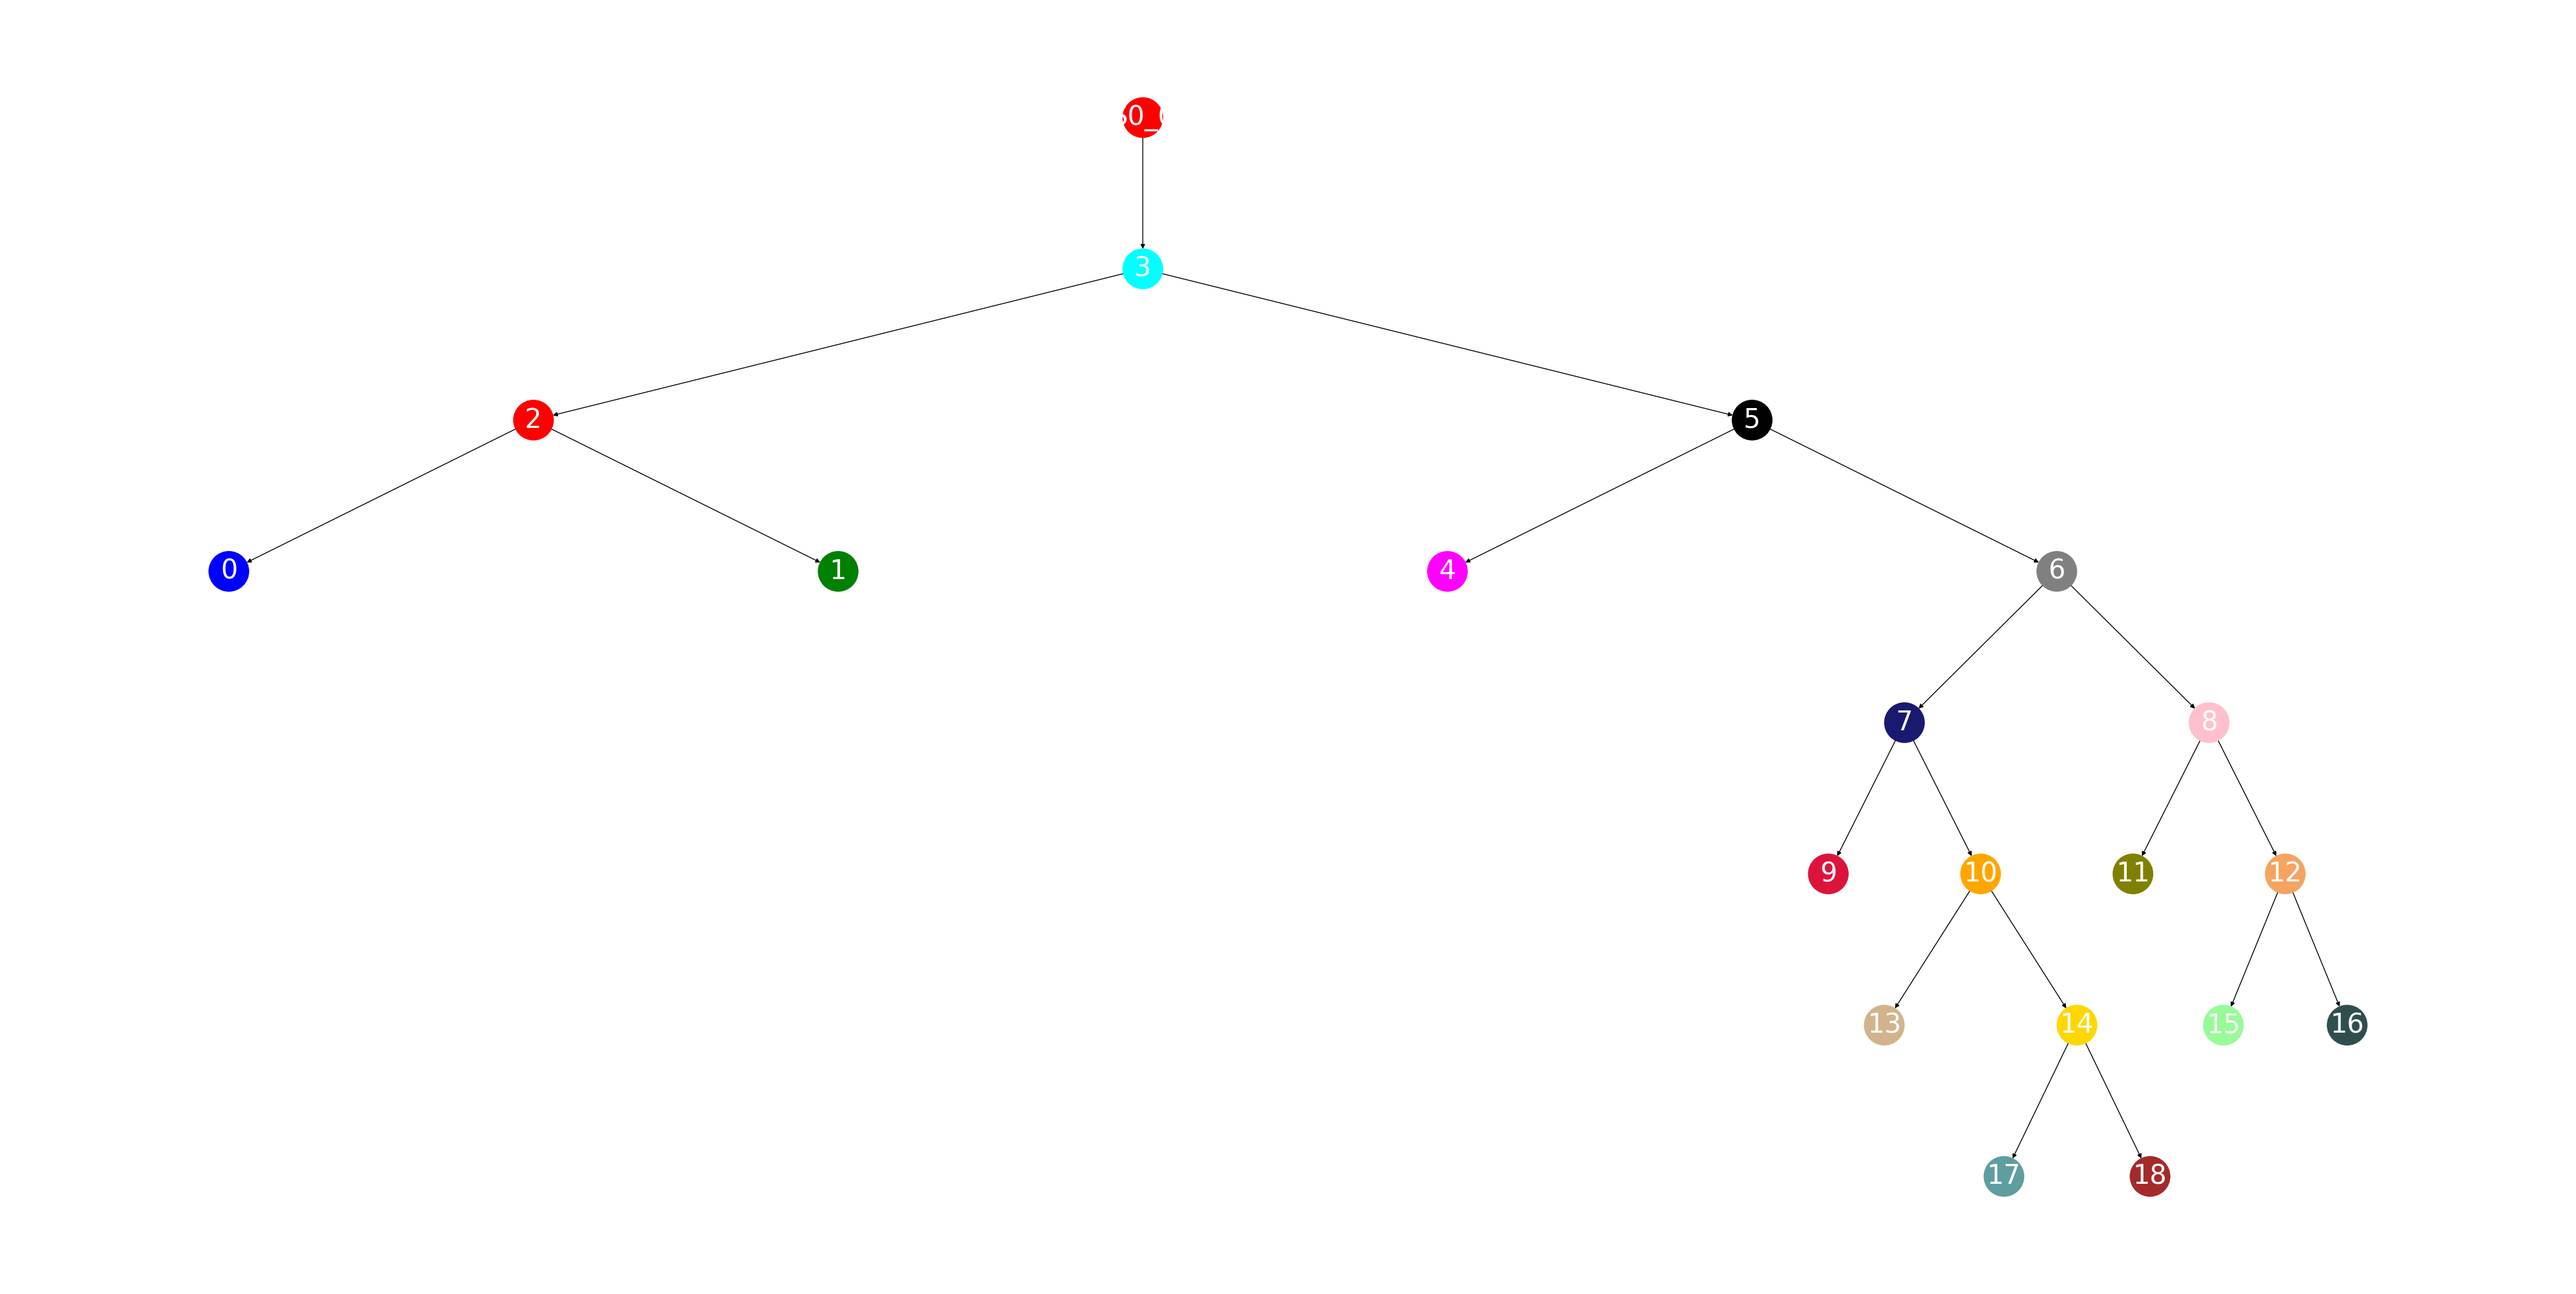

In [44]:
nviz.plot_limb(neuron_obj_rec,0)

In [37]:
branch_idx = 3
limb_idx = 0

branch_mesh = neuron_obj_rec[limb_idx][branch_idx].mesh
ipvu.plot_objects(branch_mesh)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [38]:
_ = branch_mesh.export(f"{segment_id}_limb_{limb_idx}_branch_{branch_idx}.off")

# Step 4A: Multi Soma Split Suggestions

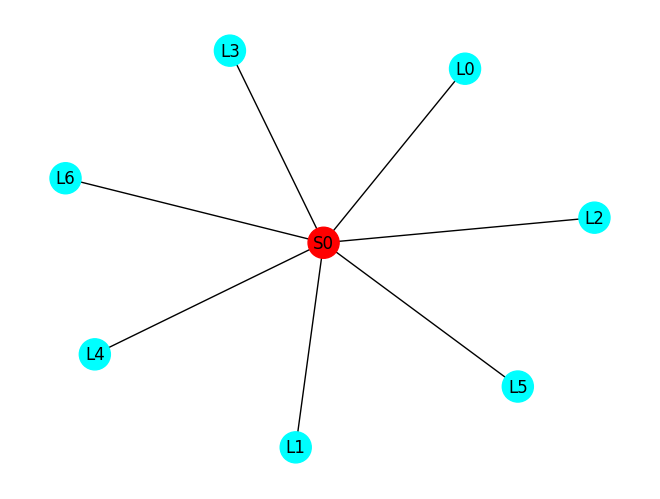

In [39]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [40]:
multi_soma_split_parameters = dict()

In [41]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [42]:
neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

# Step 4B: Multi Soma Split Execution

In [43]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [44]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':32414,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(54, 3), faces.shape=(18, 3))>, <trimesh.Trimesh(vertices.shape=(4, 3), faces.shape=(2, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(40159, 3), faces.shape=(79672, 3))>],
    'soma_run_time':74.73318791389465,
    'soma_sdfs':array([0.808672]),
  },
  'decomposition':
  {
    'bbox_volume':1.152083844966394,
    'bbox_x_max':1285750.0,
    'bbox_x_max_soma_relative':65183.36356420722,
    'bbox_x_min':1191260.0,
    'bbox_x_min_soma_relative':-29306.63643579278,
    'bbox_y_max':1293642.4680380581,
    'bbox_y_max_soma_relative':76223.39815334976,
    'bbox_y_min':1191340.0,
    '

# Step 5: Cell Typing

In [45]:
from neurd import neuron_pipeline_utils as npu

In [46]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segme

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.94it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.4525949954986572
connecting at the root
branches_touching_root = [44]
combining close nodes
combine_threshold = 1300
length of Graph = 1455
After combining close endpoints max(kept_branches_idx) = 44, len(kept_branches_idx) = 41
empty_indices % = 0.0
 conflict_indices % = 0.10211429446912823
Decomposing first pass: 1.851210117340088
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.0251998901367188e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.8596649169921875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.003751516342163086
sbv[0].reshape(-1,3) = [[1224389.875    1226609.875     153199.859375]]
closest_sk_pt_coord BEFORE = [1224265.63693452 

KeyError: 'limb_idx'


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segme


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segmen


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 5


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

invalidation_d = 1500
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 1150
filter_end_node_length_meshparty = 1150
invalidation_d = 1500
root_curr = [ 552945.2  757231.5 1044509. ]
Time for preparing soma vertices and root: 0.0002758502960205078
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.4520647525787354
branches_touching_root = [16]
combining close nodes
combine_threshold = 1300
length of Graph = 13106
After combining close endpoints max(kept_branches_idx) = 230, len(kept_branches_idx) = 190
empty_indices % = 0.0
 conflict_indices % = 0.05154251788018087
Decomposing first pass: 11.920819997787476
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 8.344650268554688e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6702880859375e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.01077127456665039
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552495.72569604  757785.38871569 1044811.89960749]
curre

In [ ]:
nviz.plot_axon(
    neuron_obj_axon
)

# Autoproofreading Stage

In [ ]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [ ]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)

# Saving off the autoproofread neuron

In [ ]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

# Plotting the final neuron

In [ ]:
from neurd import synapse_utils as syu

In [ ]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [ ]:
nviz.plot_compartments(neuron_obj_proof)

In [ ]:
%load_ext autoreload
%autoreload 2